This assignment provides an opportunity to build an ANN model using the a bank marketing dataset

https://www.kaggle.com/sriharipramod/bank-loan-classification

Target variable - personal loan - reflects whether a customer accepted a personal loan offer.

Load the data and perform EDA.

1. Evaluate missing values.
2. Assess target class distribution.
3. Pre-process data as needed.
4. Assess information value of individual features (correlation analysis and pairlot).

5 pts.

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
bank_data = pd.read_csv(io.BytesIO(uploaded['UniversalBank.csv']))


Saving UniversalBank.csv to UniversalBank.csv


Saving UniversalBank.csv to UniversalBank.csv


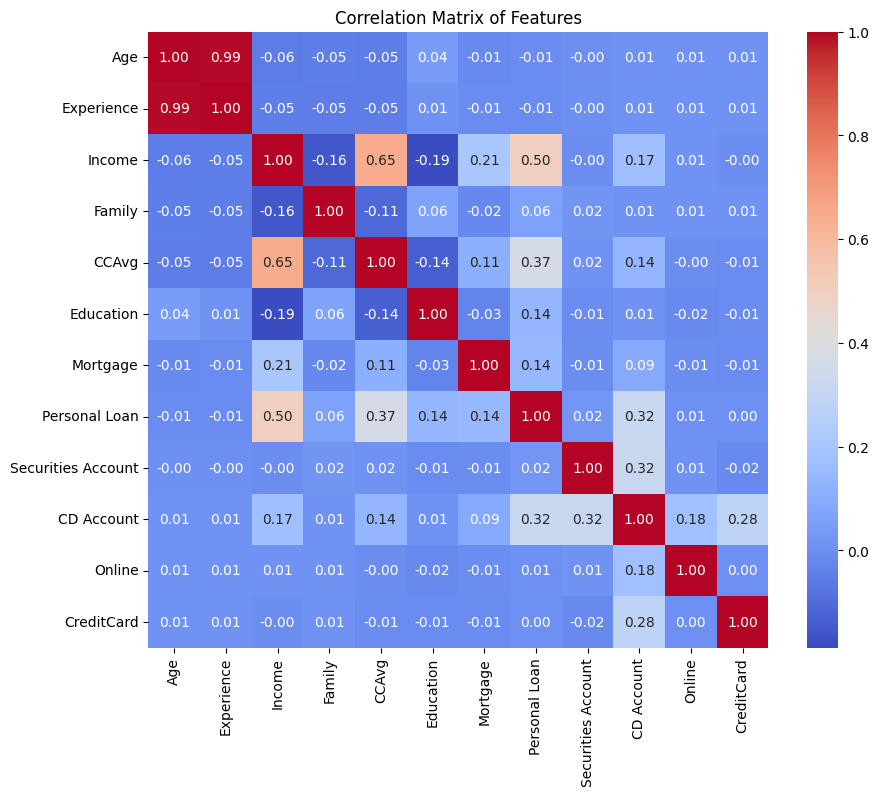

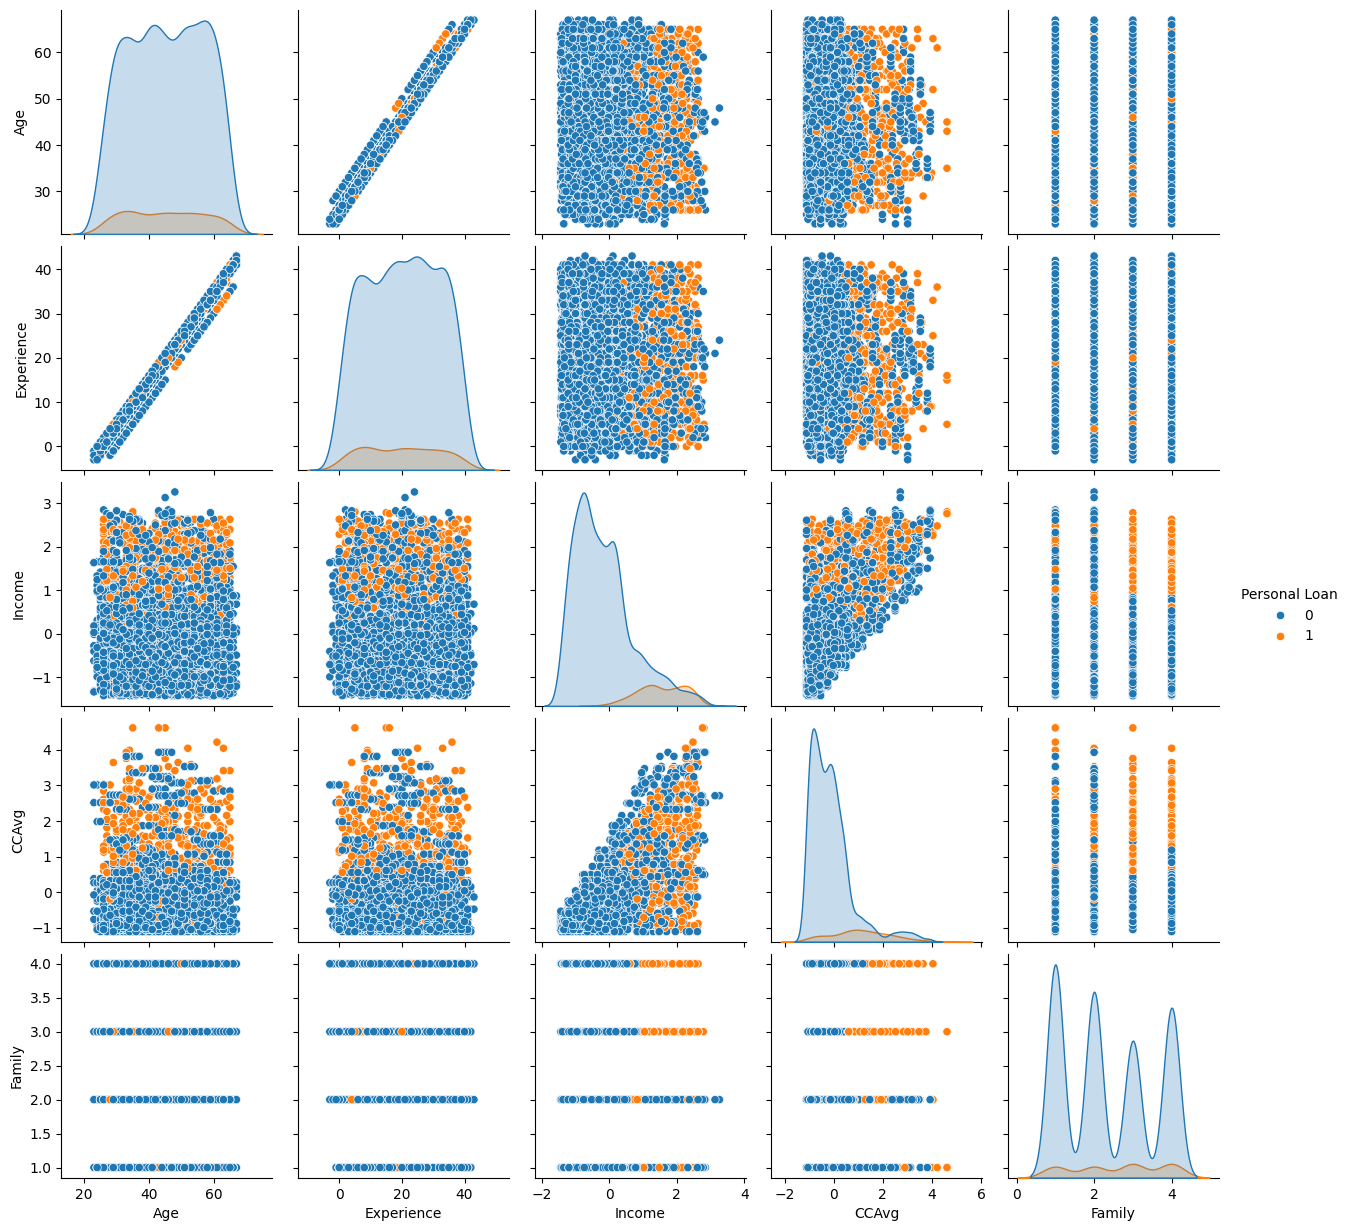

In [4]:
from google.colab import files
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Upload and read the CSV file
uploaded = files.upload()
bank_data = pd.read_csv(io.BytesIO(uploaded['UniversalBank.csv']))

# Assuming 'bank_data' holds the DataFrame
data_bank = bank_data.drop(['ID', 'ZIP Code'], axis=1)

# Feature scaling for numerical variables
scaler = StandardScaler()
scaled_columns = ['Income', 'CCAvg', 'Mortgage']
# Correct the variable name to data_bank
data_bank[scaled_columns] = scaler.fit_transform(data_bank[scaled_columns])

# Check correlations
corr_matrix = data_bank.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

# Pairplot for selected features
sns.pairplot(data_bank, vars=['Age', 'Experience', 'Income', 'CCAvg', 'Family'], hue='Personal Loan')
plt.show()

5. Split the data 70/30 into training and test datasets.
6. Develop an ANN model (MLPClassifier) with a single hidden layer with 20 nodes.
7. Assess model performance, provide the confusion matrix, classification report and ROC AUC values.

10 pts.

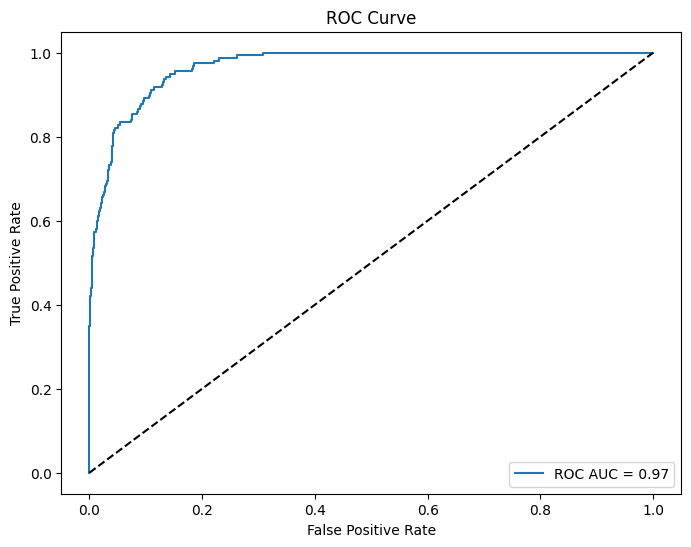

Confusion Matrix:
 [[1319   24]
 [  58   99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1343
           1       0.80      0.63      0.71       157

    accuracy                           0.95      1500
   macro avg       0.88      0.81      0.84      1500
weighted avg       0.94      0.95      0.94      1500


ROC AUC Score: 0.97


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('UniversalBank.csv')

# Drop unnecessary columns (ID, ZIP Code)
data_cleaned = data.drop(['ID', 'ZIP Code'], axis=1)

# Split features and target variable
X = data_cleaned.drop('Personal Loan', axis=1)
y = data_cleaned['Personal Loan']

# Split the data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Develop an MLP Classifier with a single hidden layer of 20 nodes
mlp = MLPClassifier(hidden_layer_sizes=(20,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)
y_prob = mlp.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print performance metrics
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print(f"\nROC AUC Score: {roc_auc:.2f}")


8. Assess the effect of the number of hidden nodes (5-30) on model accuracy.
9. Identify optimal number of nodes.

5 pts.

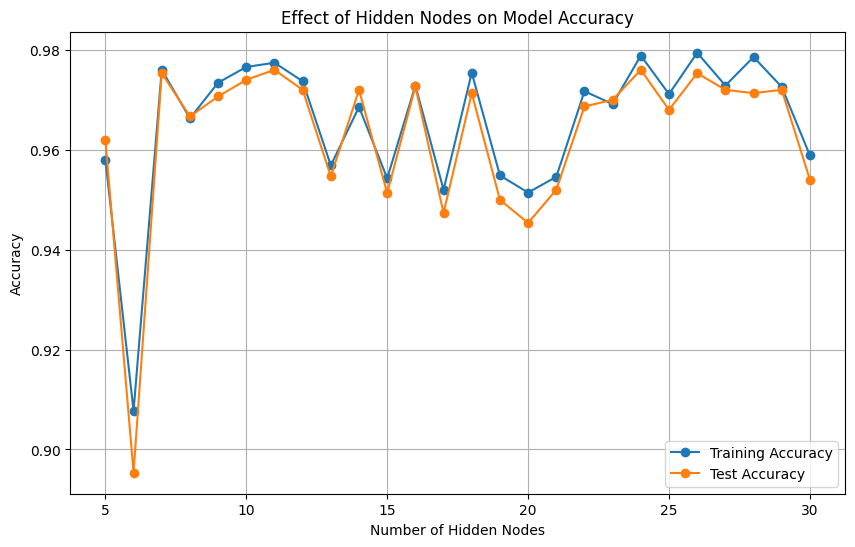

Optimal number of hidden nodes: 11


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('UniversalBank.csv')

# Drop unnecessary columns (ID, ZIP Code)
data_cleaned = data.drop(['ID', 'ZIP Code'], axis=1)

# Split features and target variable
X = data_cleaned.drop('Personal Loan', axis=1)
y = data_cleaned['Personal Loan']

# Split the data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize lists to store the number of nodes and corresponding accuracies
node_range = range(5, 31)
train_accuracies = []
test_accuracies = []

# Train MLPClassifier for each number of hidden nodes in the range
for nodes in node_range:
    mlp = MLPClassifier(hidden_layer_sizes=(nodes,), max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)

    # Predict on training and test sets
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(node_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(node_range, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('Accuracy')
plt.title('Effect of Hidden Nodes on Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Identify the optimal number of nodes based on the highest test accuracy
optimal_nodes = node_range[test_accuracies.index(max(test_accuracies))]
print(f"Optimal number of hidden nodes: {optimal_nodes}")
